## **DTS Data Science** 
# Institut Teknologi Sepuluh Nopember (Kelas B)


# **Challenge 1**

## **Nutrition Facts for McDonald's Menu**

**Introduction**

Ray Kroc wanted to build a restaurant system that would be famous for providing food of cosistently high quality and uniform methods of preparation. He wanted to serve burgers, buns, fries and beverages that tasted just the same in Alaska as they did in Alabama. To achieve this, he chose a unique path: persuading both franchisees and suppliers to buy into his vision, working not for McDonald's but for themselves, together with McDonald's. Many of McDonald's most famous menu item's - Like Big Mac, Filet-O-Fish, and Egg McMuffin were created by franchisees

**Nutrition Facts for McDonald's Menu Dataset** provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.



## Data Acquisition

Melakukan import library yang diperlukan

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

!pip install pulp
!pip install plotly_express
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import pulp as pl # is a Python linear programming API for defining problems and invoking external solvers.
from pulp import *


     |████████████████████████████████| 40.6MB 71kB/s 


In [2]:
from google.colab import files
data_to_load = files.upload()

Saving menu.csv to menu.csv


Upload file csv dataset yang digunakan menggunakan library pandas dan menampilkan data dalam file

In [3]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['menu.csv']))
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


## Data Exploratory

Melakukan pengecekan isi pada data apakah terdapat data yang kosong atau tidak

In [4]:
df.isnull().values.any()

False

Tipe data tiap kolom perlu diketahui agar mudah untuk mengelolah data dalam kolom tersebut

In [5]:
#check data
df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

## **Data Exploration**

In [6]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


# 1. How many calories does the average McDonald's value meal contain?

Pilih fitur-fitur yang akan digunakan dalam pengolahan data, dalam kasus ini dipilih fitur "Category","Calories","Calories from Fat",dan "Total Calories". Pemilihan fitur tersebut dikarenakan kita akan membandingkan nilai kalori tiap menu berdasarkan kategory.

In [7]:
calories_data = df.iloc[:,:5]
calories_data['Total Calories'] = calories_data['Calories']+calories_data['Calories from Fat']
calories_by_category = calories_data.groupby('Category').mean().sort_values(by='Total Calories')
calories_by_category

,Calories,Calories from Fat,Total Calories
Category,,,
Beverages,113.703704,0.740741,114.444444
Desserts,222.142857,64.285714,286.428571
Snacks & Sides,245.769231,94.615385,340.384615
Coffee & Tea,283.894737,71.105263,355.000000
Salads,270.000000,108.333333,378.333333
Smoothies & Shakes,531.428571,127.678571,659.107143
Beef & Pork,494.000000,224.666667,718.666667
Breakfast,526.666667,248.928571,775.595238
Chicken & Fish,552.962963,242.222222,795.185185


Didapati tabel baru berupa hasil rata-rata jumlah kalori baik dari lemak maupun bukan dan juga total kalori secara keseluruhan

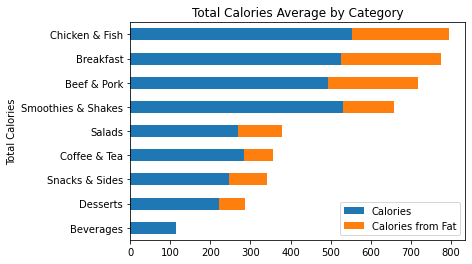

In [8]:
#Total Calories Average by Category 
calories_by_category.iloc[:,:2].plot(kind='barh', stacked=True)
plt.title('Total Calories Average by Category')
plt.ylabel('Total Calories')
plt.show()

Dari visualisasi data diketahui kategori menu Chicken & Fish memiliki rata-rata jumlah total kalori tertinggi.

# 2 How much do beverages, like soda or coffee, contribute to the overall caloric intake?

Untuk mengetahui persentase kategori menu beverges terhadap keseluruhan divisualisasikan menggunakan Pie Chart dengan data set yang digunakan adalah hasil shorting data dari mencari jumlah kalori secara keseluruhan tiap kategori menu.

<class 'pandas.core.frame.DataFrame'>


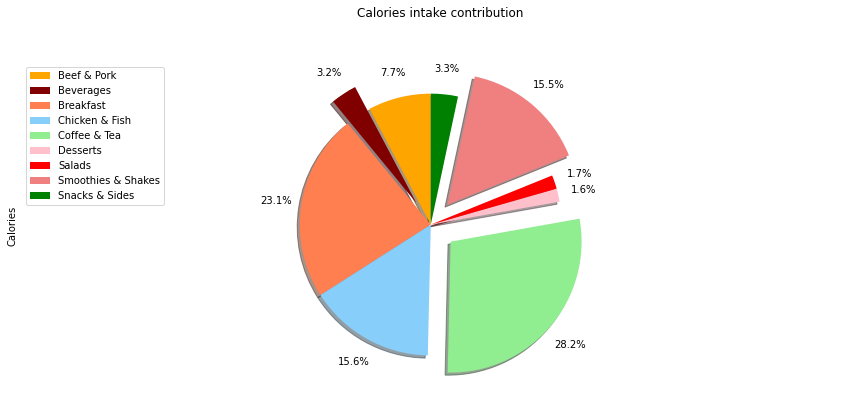

In [9]:
pie_df = df.groupby('Category', axis=0).sum()
print(type(pie_df))
colors_list = ['orange', 'maroon', 'coral', 'lightskyblue', 'lightgreen', 'pink', 'red', 'lightcoral', 'green']
explode_list = [0, 0.2, 0, 0, 0.2, 0, 0, 0.2, 0] # ratio for each category with which to offset each wedge.

pie_df['Calories'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.2,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 Categories
                            )

# scale the title up by 12% to match pctdistance
plt.title('Calories intake contribution', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=pie_df.index, loc='upper left') 

plt.show()

Visualisasi Pie Char menggambarkan bahwa kategori menu beverages mneyumbang 3.2% dari total keseluruhan menu

# 3 Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

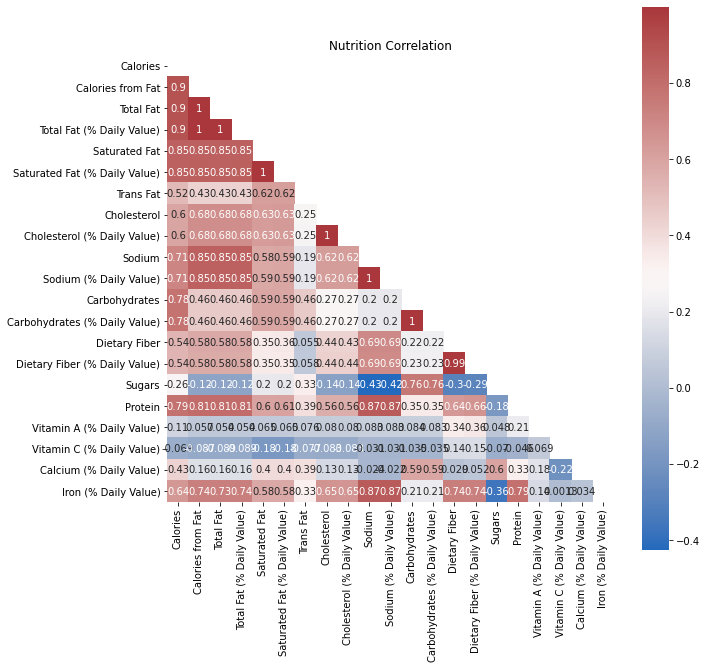

In [10]:
header = df.columns.tolist()
nutrition = ['Serving Size',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

corr = df[nutrition].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr,
                 mask = mask,
                 square =True,
                 cmap="vlag",
                 annot=True
                )
ax.set_title("Nutrition Correlation");

Dari heat map di atas, dapat kita ketahui bahwa Fat memiliki korelasi paling tinggi dengan kalori, diikuti oleh protein pada urutan kedua (0.79) dan pada urutan ketiga, karbohidrat (0.78). Selain itu korelasi dengan kalori, ada korelasi yang tinggi dengan fitur lain, misalnya sodium dan iron (0.87) dan sodium dengan protein (0.87)

In [11]:
sandwich_data = df[df['Item'].str.contains('Sandwich')]
sandwich_data = sandwich_data.iloc[:,[1,6,8,11,13,15,17,20,21,22,23]]
sandwich_data['Total Value'] = sandwich_data.sum(axis=1)
sandwich_data['Chicken Type'] = sandwich_data['Item'].str.extract("(Crispy|Grilled)")
sandwich_data


,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Value,Chicken Type
57,Premium Crispy Chicken Classic Sandwich,33,18,16,41,18,13,4,6,15,20,184,Crispy
58,Premium Grilled Chicken Classic Sandwich,13,9,22,34,14,13,4,8,15,20,152,Grilled
59,Premium Crispy Chicken Club Sandwich,51,44,29,59,19,14,8,20,30,20,294,Crispy
60,Premium Grilled Chicken Club Sandwich,31,36,35,52,15,13,8,20,30,20,260,Grilled
61,Premium Crispy Chicken Ranch BLT Sandwich,43,31,24,58,19,13,4,20,15,20,247,Crispy
62,Premium Grilled Chicken Ranch BLT Sandwich,23,22,30,51,14,13,4,20,15,20,212,Grilled
63,Bacon Clubhouse Crispy Chicken Sandwich,59,51,31,72,22,15,8,25,30,15,328,Crispy
64,Bacon Clubhouse Grilled Chicken Sandwich,39,42,37,65,17,15,8,30,30,15,298,Grilled
65,Southern Style Crispy Chicken Sandwich,29,15,14,38,14,7,4,2,15,15,153,Crispy


In [12]:
chicken_data = sandwich_data.groupby('Chicken Type').mean().sort_values(by='Total Value')
chicken_data

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Value
Chicken Type,,,,,,,,,,,
Grilled,26.5,27.25,31.0,50.5,15.0,13.5,6.0,19.5,22.5,18.75,230.5
Crispy,43.0,31.80,22.8,53.6,18.4,12.4,5.6,14.6,21.0,18.00,241.2


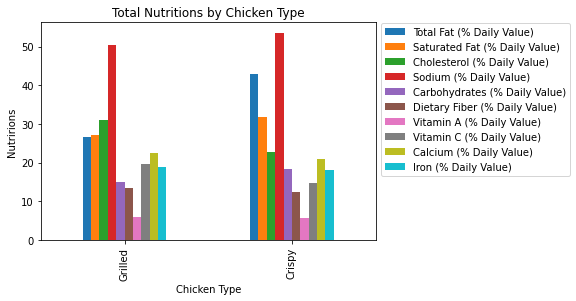

In [13]:
chicken_data.iloc[:,:10].plot(kind='bar', stacked=False)
plt.title('Total Nutritions by Chicken Type')
plt.ylabel('Nutririons')
plt.xlabel('Chicken Type')

plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5, 0, 0.52))

plt.show()   

Dari grafik di atas, dapat dilihat bilamana banyak nutrisi baik pada Menu Sandwich dengan isian Grilled Chicken lebih tinggi daripada menu Sandwich dengan isian Crispy Chicken.

# 4 What about ordering egg whites instead of whole eggs?

Sebelum menganalisis lebih jauh, isi dari data set difilter terlebih dahulu, kemudian menu yang mengandung telur ditampilkan seperti pada tabel berikut ini.

In [14]:
egg_data = df[df['Item'].str.contains('Egg')]
egg_data = egg_data.iloc[:,[1,6,8,11,13,15,17,20,21,22,23]]
egg_data['Total Value'] = egg_data.sum(axis=1)
egg_data['Egg Type'] = egg_data['Item'].str.extract("(Egg Whites|Egg)")
egg_data

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Value,Egg Type
0,Egg McMuffin,20,25,87,31,10,17,10,0,25,15,240,Egg
1,Egg White Delight,12,15,8,32,10,17,6,0,25,8,133,Egg
3,Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15,313,Egg
4,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10,198,Egg Whites
5,Steak & Egg McMuffin,36,46,100,40,10,18,15,2,30,20,317,Egg
6,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",40,65,83,54,13,7,10,8,15,15,310,Egg
7,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",47,68,83,59,14,12,15,8,20,20,346,Egg
8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",32,56,11,54,12,7,2,8,15,10,207,Egg
9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",38,59,11,59,14,12,6,8,15,15,237,Egg
12,Sausage Biscuit with Egg (Regular Biscuit),50,71,83,49,12,6,6,0,10,20,307,Egg


In [15]:
egg_data = egg_data.groupby('Egg Type').mean().sort_values(by='Total Value')
egg_data

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Value
Egg Type,,,,,,,,,,,
Egg Whites,56.142857,67.000000,14.285714,66.142857,20.571429,16.285714,2.571429,1.142857,15.857143,18.571429,278.571429
Egg,39.333333,53.555556,63.833333,51.611111,13.944444,11.277778,9.944444,5.000000,19.722222,16.277778,284.500000


Tabel di atas menampilkan rata-rata nilai kandungan nutrisi dari menu-menu yang mengandung telur utuh dan putih telur saja. Dapat dilihat, menu yang mengandung putih telur saja memiliki kandungan kolesterol yang jauh lebih rendah daripada menu-menu yang mengandung telur utuh, begitu juga dengan total value nutrisi yang lebih rendah daripada menu-menu yang memiliki telur utuh sebagai salah satu komposisinya. Berikut ditampilkan visualisasi dari tabel terkait.

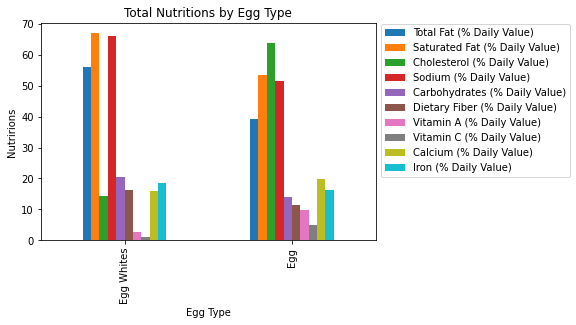

In [16]:
egg_data.iloc[:,:10].plot(kind='bar', stacked=False)
plt.title('Total Nutritions by Egg Type')
plt.ylabel('Nutririons')
plt.xlabel('Egg Type')

plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5, 0, 0.52))

plt.show()


# 5. What is the least number of items could you order from the menu to meet  one day's nutritional requirements with minimum calories?


Untuk mengetahui jumlah menu yang bisa dipesan dengan kalori minimum, kami menggunakan Pemrograman linier akan digunakan sebagai metode optimasi. Karena metode ini dapat melakukan proses kalkulasi yang cukup cepat, di mana tidak terdapat korelasi orde tinggi yang masuk ke dalam fungsi objektif.

Hal pertama yang harus dilakukan adalah mendefinisikan Objective Function (antara meminimalkan atau memaksimalkan). Berdasarkan studi kasus kali ini, Objective Function yang akan digunakan adalah meminimalkan jumlah kalori.

Untuk menjawab pertanyaan ini, kami menggunakan Peraturan Menteri Kesehatan Republik Indonesia Nomor 28 tahun 2019 tentang Angka Kecukupan Gizi yang dianjurkan untuk Masyarakat Indonesia sebagai acuan constraints
(http://www.p2ptm.kemkes.go.id/)

* Energy: ~2,000 kcal
* Total Fat: < 65 g (Saturated < 32g)
* Carbohydrates > 260g
* Sugars: 220g ~ 260g
* Protein: 60g ~ 65g
* Sodium: < 5g


In [17]:
#Ubah data menjadi tipe Dictionaries,sehingga variable constraints bisa masuk ke dalam fungsi optimisasi.
# Convert the item names to a list
menu_mcd = df.Item.tolist()
# Convert all of the macro nutrients fields to be dictionaries of the item names
Calories = df.set_index('Item')['Calories'].to_dict()
TotalFat = df.set_index('Item')['Total Fat'].to_dict()
SaturatedFat = df.set_index('Item')['Saturated Fat'].to_dict()
Carbohydrates = df.set_index('Item')['Carbohydrates'].to_dict()
Sugars = df.set_index('Item')['Sugars'].to_dict()
Protein = df.set_index('Item')['Protein'].to_dict()
Sodium = df.set_index('Item')['Sodium'].to_dict()

In [18]:
#minimization problem
prob=LpProblem("McOptimizationProblem",LpMinimize)

Perlu untuk menentukan jumlah item minimum, yaitu 1 (tidak bernilai negatif dan tidak berbentuk desimal). Sehingga perlu untuk memerintah optimizer ini untuk memberikan output berupa integer saja. Selain itu, kita juga bisa menentukan jumlah minimum dan maksimum item sebagai output.

In [19]:
#set the minimum amount
variasi_menu = LpVariable.dicts("MenuItems",menu_mcd,lowBound=0,upBound=10,cat='Integer')

In [20]:
#Constraints dimasukkan ke dalam fungsi optimisasi
#Constraints
# First entry is the calorie calculation
prob += lpSum([Calories[i]*variasi_menu[i] for i in menu_mcd]), 'Calories'
# Total Fat must be <= 65 g
prob += lpSum([TotalFat[i]*variasi_menu[i] for i in menu_mcd]) <=65, 'Total_Fat'
# Saturated Fat is <= 32 g
prob += lpSum([SaturatedFat[i]*variasi_menu[i] for i in menu_mcd]) <= 32, 'Saturated_Fat'
# Carbohydrates must be more than 260 g
prob += lpSum([Carbohydrates[i]*variasi_menu[i] for i in menu_mcd]) >= 360, "Carbohydrates_lower"
prob += lpSum([Carbohydrates[i]*variasi_menu[i] for i in menu_mcd]) <= 430, "Carbohydrates_upper"
# Sugar between 220-260 g
prob += lpSum([Sugars[i]*variasi_menu[i] for i in menu_mcd]) >= 220, 'Sugars_lower'
prob += lpSum([Sugars[i]*variasi_menu[i] for i in menu_mcd]) <= 260, 'Sugars_upper'
# Protein between 60-65g
prob += lpSum([Protein[i]*variasi_menu[i] for i in menu_mcd]) >= 60, 'Protein_lower'
prob += lpSum([Protein[i]*variasi_menu[i] for i in menu_mcd]) <= 65, 'Protein_upper'
# Sodium <= 5000 mg
prob += lpSum([Sodium[i]*variasi_menu[i] for i in menu_mcd]) <= 5000, 'Sodium'

In [21]:
prob.writeLP("McOptimization.lp")
prob.solve()
data_matrix = []

print("Status:", LpStatus[prob.status])
for v in prob.variables():
    if v.varValue > 0:
        Item = df.loc[df['Item'] == v.name.replace('MenuItems_','').replace('_',' ')]
        Item_Calories = Item['Calories'].values*v.varValue
        Item_TotalFat = Item['Total Fat'].values*v.varValue
        Item_Carbohydrates = Item['Carbohydrates'].values*v.varValue
        Item_Protein = Item['Protein'].values*v.varValue
        Item_Sodium = Item['Sodium'].values*v.varValue
        data_matrix.append([v.name.replace('MenuItems_','').replace('_',' '),v.varValue,Item_Calories[0], \
                           Item_TotalFat[0],Item_Carbohydrates[0],Item_Protein[0],Item_Sodium[0]])
print(' ')
results = {}
# Get the total calories (minimized)
print("Total Calories = ", value(prob.objective))
# Loop over the constraint set and get the final solution
results = {}
for constraint in prob.constraints:
    total_s = 0

Status: Optimal
 
Total Calories =  1530.0


Dari sini dapat diketahui bahwa metode yang digunakan dapat memberikan hasil sesuai yang diinginkan (optimum), dengan jumlah kalori 1530 kcal.

In [22]:
import plotly as py
import plotly.figure_factory as ff

In [23]:
table = ff.create_table(data_matrix)
print(data_matrix)

[['Apple Slices', 10.0, 150.0, 0.0, 40.0, 0.0, 0.0], ['Diet Dr Pepper (Child)', 2.0, 0.0, 0.0, 0.0, 2.0, 100.0], ['Diet Dr Pepper (Large)', 10.0, 0.0, 0.0, 0.0, 40.0, 1400.0], ['Dr Pepper (Medium)', 2.0, 380.0, 0.0, 106.0, 0.0, 130.0], ['Fruit & Maple Oatmeal without Brown Sugar', 2.0, 520.0, 8.0, 98.0, 10.0, 230.0], ['Minute Maid 100% Apple Juice Box', 4.0, 320.0, 0.0, 84.0, 0.0, 60.0], ['Side Salad', 8.0, 160.0, 0.0, 32.0, 8.0, 80.0]]


In [25]:
data_matrix1=list(map(list, zip(*data_matrix)))

itm = data_matrix1[0]
amo = data_matrix1[1]
cal = data_matrix1[2]
tfat = data_matrix1[3]
carb = data_matrix1[4]
pro = data_matrix1[5]
sdm = data_matrix1[6]
# dictionary of lists
dict = {'Item': itm, 'Amount': amo, 'Calories': cal, 'Total Fat': tfat, 'Carbohydrates': carb, 'Protein': pro,
        'Sodium': sdm}

hasil_akhir = pd.DataFrame(dict)

hasil_akhir
print(hasil_akhir.to_string())

                                        Item  Amount  Calories  Total Fat  Carbohydrates  Protein  Sodium
0                               Apple Slices    10.0     150.0        0.0           40.0      0.0     0.0
1                     Diet Dr Pepper (Child)     2.0       0.0        0.0            0.0      2.0   100.0
2                     Diet Dr Pepper (Large)    10.0       0.0        0.0            0.0     40.0  1400.0
3                         Dr Pepper (Medium)     2.0     380.0        0.0          106.0      0.0   130.0
4  Fruit & Maple Oatmeal without Brown Sugar     2.0     520.0        8.0           98.0     10.0   230.0
5           Minute Maid 100% Apple Juice Box     4.0     320.0        0.0           84.0      0.0    60.0
6                                 Side Salad     8.0     160.0        0.0           32.0      8.0    80.0


Setelah dilakukan optimisasi menggunakan metode pemrograman linier, dapat diketahui bahwa seseorang dapat mengonsumsi 6 jenis menu dengan jumlah dan ukuran porsi seperti yang tertera pada tabel di atas.